# Linear Regression from Scratch (NumPy Implementation)

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

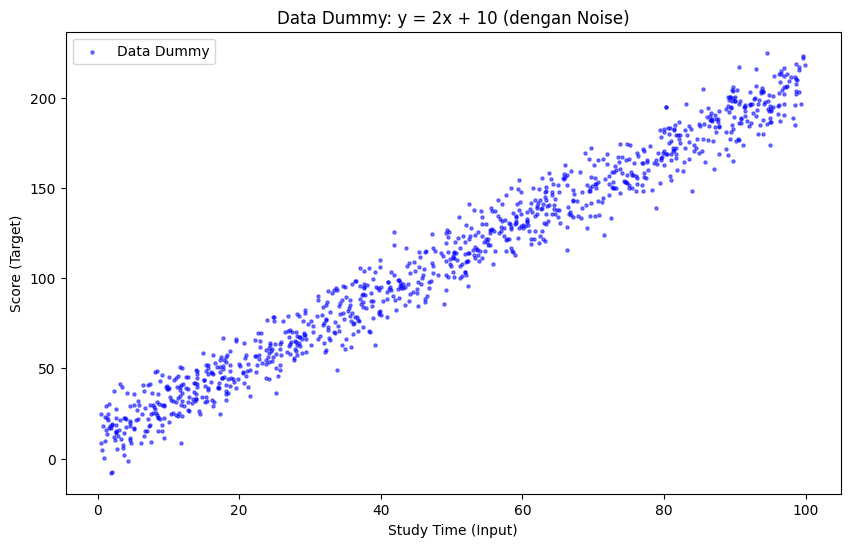

Bentuk X: (1000,)
Bentuk y: (1000,)
Contoh 5 data pertama study_time: [37.45401188 95.07143064 73.19939418 59.86584842 15.60186404]
Contoh 5 data pertama score: [ 86.68503378 186.78941769 160.20076687 135.83755429  46.80163257]


In [2]:
# Konfigurasi/persiapan data yang ingin kita gunakan 

jumlah_data = 1000
m_asli = 2          # Kemiringan (Slope) asli yang kita inginkan
b_asli = 10         # Titik potong (Intercept) asli yang kita inginkan
level_noise = 10    # Seberapa berantakan datanya

# --- Generate data --- 

# Untuk lebih intuitive, kita misalkan saja X = study_time dan y = score

# Bikin X (Fitur) 
np.random.seed(42)
study_time = np.random.rand(jumlah_data) * 100

# Bikin Noise (Biar datanya gak lurus), sifatnya distribusi normal bukan uniform
noise = np.random.randn(jumlah_data) * level_noise

# Bikin y (Target)
score = (m_asli * study_time) + b_asli + noise

# --- VISUALISASI ---
# Kita cek apakah datanya sudah terlihat seperti yang kita mau
plt.figure(figsize=(10, 6))
plt.scatter(study_time, score, s=5, color='blue', alpha=0.5, label='Data Dummy')
plt.title(f"Data Dummy: y = {m_asli}x + {b_asli} (dengan Noise)")
plt.xlabel("Study Time (Input)")
plt.ylabel("Score (Target)")
plt.legend()
plt.show()

print(f"Bentuk X: {study_time.shape}")
print(f"Bentuk y: {score.shape}")
print(f"Contoh 5 data pertama study_time: {study_time[:5]}")
print(f"Contoh 5 data pertama score: {score[:5]}")

In [3]:
# Kita jadikan satu tabel (bisa dibayang juga seperti bentuk excel)
points = pd.DataFrame({
    'study_time': study_time,
    'score': score
})

# Cek tabel DataFrame
print("Contoh DataFrame 'points':")
print(points.head())

n = len(points)
print(n)    


Contoh DataFrame 'points':
   study_time       score
0   37.454012   86.685034
1   95.071431  186.789418
2   73.199394  160.200767
3   59.865848  135.837554
4   15.601864   46.801633
1000


<div align="center">
    <a href="https://www.youtube.com/watch?v=VmbA0pi2cRQ" target="_blank">
        <img src="../assets/Video_Tutorial.png"alt="Klik untuk ke Source Video">
    </a>
    <br>
    <em>Gambar 1. Overview Video Tutorial (Klik gambar untuk mengunjungi Source Video)</em>
    <br>
    <br>
</div>


> Berikut merupakan sumber belajar saya untuk mendapatkan gambaran lebih jelasnya. Untuk ilmu belajar matematika nya. bisa kunjungi link github berikut ini :  [Mathematics Source](https://github.com/Zendin110206/ml-path-to-mastery). Juga saya menyarankan untuk menonton video youtube berikut ini : 

<div align="center">
    <a href="https://www.youtube.com/watch?v=nk2CQITm_eo" target="_blank">
        <img src="../assets/Video_Penjelasan.png"alt="Klik untuk ke Source Video">
    </a>
    <br>
    <em>Gambar 2. Overview Video Penjelasan Linear Regression (Klik gambar untuk mengunjungi Source Video)</em>
    <br>
    <br>
</div>

In [4]:
def loss_function(m,b, points):
    total_error = 0
    for i in range(len(points)):
        X = points.iloc[i].study_time # iloc = integer location
        y = points.iloc[i].score 
        total_error += (y - (m * X + b)) ** 2
    return total_error / float(len(points))

Q: Kenapa kok ada sebuah fungsi `loss_function`? Apa ide besarnya? kenapa kok begitu fungsinya? 

A: Berikut penjelasannya :

### Idenya Mau Ngapain Sih?
Kita kan akan membuat sebuah garis prediksi, nah tentu saja yang namanya garis prediksi memiliki kesalahan yaitu nilai yang diprediksi ternyata tidak sama dengan nilai aslinya. 

Bayangin aja, `loss_function` itu tugasnya menilai : "Seberapa besar kesalahan tebakan si Model ini" Kalau tebakannya akurat, maka nilainya akan menghasilkan *Error Kecil*. Kalau tebakannya meleset jauh, maka nilainya akan *Error Besar*.

---

### Kenapa Rumusnya Begitu? (Bedah Kode)

Mari kita lihat baris paling krusial ini:

```python
total_error += (y - (m * X + b)) ** 2

```

Ini terjemahan dari rumus matematika . Kita bedah satu-satu:

#### a. `(m * X + b)` -> Ini TEBAKAN

Ini adalah rumus garis lurus biasa.

* Si Model bilang: *"Oke, berdasarkan m (kemiringan) dan b (posisi) yang aku punya sekarang, aku bakalan nebak nilai si Budi harusnya segini."*

#### b. `y` -> Ini KENYATAAN

Ini data asli dari tabel `points`.

* Kenyataannya: *"Nilai asli si Budi itu 80."*

#### c. `y - (...)` -> Ini SELISIH (Jarak)

* Misal Tebakan = 50, Kenyataan = 80.
* Selisih = 30.
* Ini yang disebut **Residual** atau seberapa jauh melesetnya.

#### d. `** 2` -> Ini KUADRAT (Hukuman)

Kenapa harus dikuadratin (pangkat 2)? Kenapa gak selisih biasa aja?
Ada 2 alasan logis:

1. **Mematikan Tanda Minus:** Kalau tebakan meleset ke bawah (-10) dan meleset ke atas (+10), kalau dijumlah biasa hasilnya 0. Seolah-olah gak ada salah. Padahal salah dua-duanya! Dengan dikuadratin, . Jadi semua kesalahan dihitung positif.
2. **Menghukum Kesalahan Besar:**
* Meleset 1 poin ->  (Hukuman ringan).
* Meleset 10 poin ->  (Hukuman berat).
* Model jadi "takut" bikin kesalahan yang jauh banget.

---

### Bagian `return` dan `float(len(points))`

```python
return total_error / float(len(points))

```

Di sini kita menjumlahkan SEMUA kesalahan dari 1.000 siswa (`total_error`), lalu dibagi jumlah siswanya (`len(points)`).

**Maksudnya:** Kita mau cari **RATA-RATA Kesalahan per Siswa**.

* Kalau gak dibagi, makin banyak datanya, errornya bakal kelihatan makin raksasa. Itu gak adil.
* Dengan dibagi rata-rata (Mean), kita bisa bilang: *"Oke, rata-rata model ini meleset sekitar 5 poin per siswa."*

Itulah kenapa nama resminya **Mean Squared Error (MSE)**.

* **Mean:** Rata-rata (dibagi N).
* **Squared:** Dikuadratkan (`**2`).
* **Error:** Selisih (`y - prediksi`).


In [5]:
def gradient_descent(m_now, b_now, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    for i in range(n):
        X = points.iloc[i].study_time
        y = points.iloc[i].score
        
        # Ini adalah terjemahan langsung dari rumus matematika di papan tulis hitam
        # Rumus Turunan Partial E terhadap m
        m_gradient += -(2/n) * X * (y - (m_now * X + b_now))
        
        # Rumus Turunan Partial E terhadap b
        b_gradient += -(2/n) * (y - (m_now * X + b_now))
        
    # --- UPDATE (Langkah kaki) ---
    # Geser m dan b ke arah sebaliknya (lawan gradient)
    m_new = m_now - (m_gradient * learning_rate)
    b_new = b_now - (b_gradient * learning_rate)   
    
    return m_new, b_new

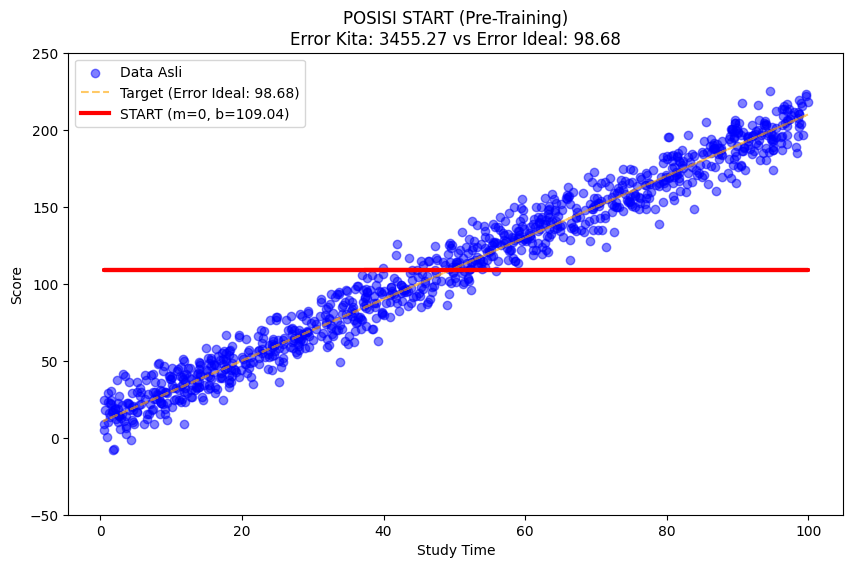

In [42]:
# Ini dipakai kalau misalnya ingin memulai garis awalnya adalah nilai mean. (StatQuest memulai garis bodoh dari sini)
rata_rata_nilai = points['score'].mean()
rata_rata_nilai = rata_rata_nilai.round(2) # Tidak direkomendasikan untuk praktik, tapi ini hanya digunakan untuk keperluan belajar

# --- 1. SETTING POSISI AWAL ---
m_init = 0
b_init = rata_rata_nilai # Gonta ganti bagian ini untuk bermain main dengan garisnya. 

# Hitung garis prediksi TANPA Gradient Descent
y_prediksi_awal = m_init * study_time + b_init

# Hitung Error
error_awal = loss_function(m_init, b_init, points)         # Error kondisi sekarang
error_ideal = loss_function(m_asli, b_asli, points)        # Error target (Kunci Jawaban)

# --- 2. VISUALISASI ---
plt.figure(figsize=(10, 6))

# Gambar Data Asli (Biru)
plt.scatter(study_time, score, color='blue', alpha=0.5, label='Data Asli')

# Gambar Kunci Jawaban (oren putus-putus)
y_kunci = m_asli * study_time + b_asli
plt.plot(study_time, y_kunci, color='orange', linestyle='--', alpha=0.6, label=f'Target (Error Ideal: {error_ideal:.2f})')
# Gambar MODEL AWAL (Merah Tebal)
plt.plot(study_time, y_prediksi_awal, color='red', linewidth=3, label=f'START (m={m_init}, b={b_init})')

plt.title(f"POSISI START (Pre-Training)\nError Kita: {error_awal:.2f} vs Error Ideal: {error_ideal:.2f}")
plt.xlabel("Study Time")
plt.ylabel("Score")
plt.legend()
plt.ylim(-50, 250) # Kita atur batas Y biar garis merah yang di bawah tetap kelihatan
plt.show()

In [49]:
# --- CONFIGURATION & INITIALIZATION ---
# Menggunakan nilai awal yang sudah kita set di tahap sebelumnya (Baseline: rata-rata)
m = m_init
b = b_init

L = 0.0001      # Learning Rate: Mengontrol seberapa besar langkah perbaikan tiap epoch
epochs = 1000   # Epochs: Jumlah iterasi atau pengulangan proses belajar

# --- TRAINING PROCESS ---
print(f"Starting Training... (Initial: m={m:.4f}, b={b:.4f})")

for i in range(epochs):
    # 1. Update parameter (m & b) menggunakan Gradient Descent
    # Fungsi ini mengembalikan nilai m dan b baru yang sudah digeser melawan arah gradient
    m, b = gradient_descent(m, b, points, L)
    
    # 2. Monitoring Progress
    # Cek nilai Loss setiap 100 epoch untuk memastikan error terus menurun (converging)
    if i % 100 == 0:
        current_loss = loss_function(m, b, points)
        print(f"Epoch {i}: m={m:.4f}, b={b:.4f}, Loss={current_loss:.4f}")

print("Training Finished!")

# --- EVALUATION ---
print("-" * 40)
print(f"Final Model Parameters  -> m: {m:.4f}, b: {b:.4f}")
print(f"Ground Truth (Target)   -> m: {m_asli}, b: {b_asli}")
print("-" * 40)

Starting Training... (Initial: m=0.0000, b=109.0400)
Epoch 0: m=0.3384, b=109.0400, Loss=2683.0005
Epoch 100: m=0.5271, b=108.5346, Loss=2550.3641
Epoch 200: m=0.5347, b=108.0292, Loss=2524.8126
Epoch 300: m=0.5423, b=107.5264, Loss=2499.5272
Epoch 400: m=0.5498, b=107.0262, Loss=2474.5053
Epoch 500: m=0.5573, b=106.5287, Loss=2449.7440
Epoch 600: m=0.5648, b=106.0337, Loss=2425.2407
Epoch 700: m=0.5722, b=105.5414, Loss=2400.9926
Epoch 800: m=0.5796, b=105.0516, Loss=2376.9971
Epoch 900: m=0.5869, b=104.5643, Loss=2353.2515
Training Finished!
----------------------------------------
Final Model Parameters  -> m: 0.5941, b: 104.0844
Ground Truth (Target)   -> m: 2, b: 10
----------------------------------------


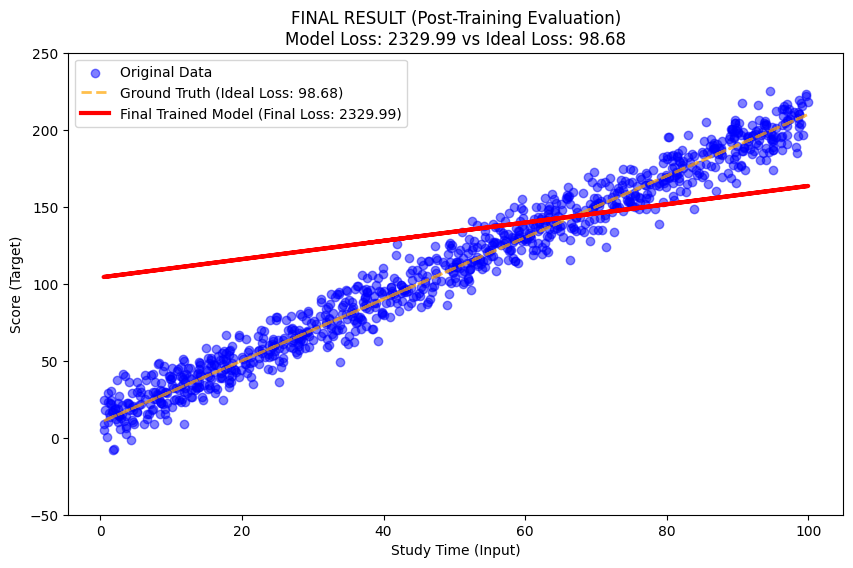

In [50]:
# --- FINAL EVALUATION VISUALIZATION ---

# 1. Calculate Final Predictions & Error Metric
# Menggunakan nilai m dan b terakhir setelah loop training selesai
y_prediksi_final = m * study_time + b

# Hitung loss akhir untuk ditampilkan di judul grafik
error_akhir = loss_function(m, b, points)

# 2. Plotting
plt.figure(figsize=(10, 6))

# A. Scatter Plot Data Asli
plt.scatter(study_time, score, color='blue', alpha=0.5, label='Original Data')

# B. Ground Truth Line (Garis Target/Ideal)
# Kita gunakan kembali m_asli dan b_asli untuk referensi
y_kunci = m_asli * study_time + b_asli
plt.plot(study_time, y_kunci, color='orange', linestyle='--', linewidth=2, alpha=0.7, 
         label=f'Ground Truth (Ideal Loss: {error_ideal:.2f})')

# C. Final Trained Model Line (Garis Hasil Training)
plt.plot(study_time, y_prediksi_final, color='red', linewidth=3, 
         label=f'Final Trained Model (Final Loss: {error_akhir:.2f})')

# 3. Labels and Title
# Menampilkan perbandingan Loss Akhir model kita vs Loss Ideal di judul
plt.title(f"FINAL RESULT (Post-Training Evaluation)\nModel Loss: {error_akhir:.2f} vs Ideal Loss: {error_ideal:.2f}")
plt.xlabel("Study Time (Input)")
plt.ylabel("Score (Target)")
plt.legend()

# Optional: Mengatur batas axis Y agar konsisten dengan visualisasi awal
plt.ylim(-50, 250)

plt.show()

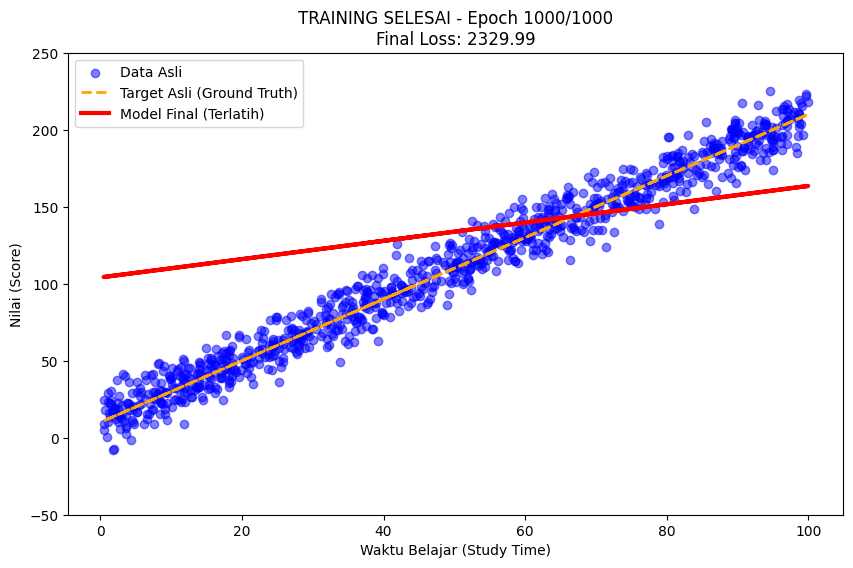

Proses training selesai. Model telah mencapai konvergensi.


In [55]:
from IPython.display import clear_output
import time

# --- 1. KONFIGURASI & INISIALISASI ---
# Mereset parameter ke nilai baseline (Rata-rata) yang sudah ditentukan sebelumnya
m = m_init
b = b_init
L = 0.0001      # Learning rate (Laju pembelajaran)
epochs = 1000   # Total iterasi

# --- 2. VISUALISASI PRE-TRAINING (KONDISI AWAL) ---
# Menampilkan kondisi model sebelum proses training dimulai
clear_output(wait=True)
plt.figure(figsize=(10, 6))

# Plot Data Asli & Ground Truth (Target)
plt.scatter(study_time, score, color='blue', alpha=0.5, label='Data Asli')
y_ground_truth = m_asli * study_time + b_asli
plt.plot(study_time, y_ground_truth, color='orange', linestyle='--', linewidth=2, label='Target Asli (Ground Truth)')

# Plot Model Awal (Baseline)
y_start = m * study_time + b
plt.plot(study_time, y_start, color='red', linewidth=3, label=f'Model Awal (Pre-Training)')

plt.title(f"KONDISI AWAL (Epoch 0/{epochs})\nLoss: {loss_function(m, b, points):.2f}")
plt.xlabel("Waktu Belajar (Study Time)")
plt.ylabel("Nilai (Score)")
plt.legend()
plt.ylim(-50, 250)
plt.show()

# Jeda 3 detik agar audiens dapat mengamati posisi awal garis
print("Menginisialisasi visualisasi training... (Mulai dalam 3 detik)")
time.sleep(3)


# --- 3. LOOP TRAINING (ANIMASI LANGSUNG) ---
for i in range(epochs):
    # Update parameter m dan b menggunakan Gradient Descent
    m, b = gradient_descent(m, b, points, L)
    
    # --- LOGIKA VISUALISASI ---
    tampilkan_plot = False
    durasi_pause = 0
    
    # Fase 1: Gerakan Lambat (5 Epoch Pertama)
    # Menampilkan setiap langkah untuk mengamati perubahan awal parameter
    if i < 5: 
        tampilkan_plot = True
        durasi_pause = 1.0 
        
    # Fase 2: Dipercepat (Sisa Epoch)
    # Menampilkan visualisasi setiap 50 langkah untuk mempercepat proses
    elif i % 50 == 0:
        tampilkan_plot = True
        durasi_pause = 0.01
        
    # Eksekusi Plotting
    if tampilkan_plot:
        clear_output(wait=True)
        
        # Hitung prediksi saat ini
        y_pred = m * study_time + b
        
        plt.figure(figsize=(10, 6))
        plt.scatter(study_time, score, color='blue', alpha=0.5, label='Data Asli')
        plt.plot(study_time, y_ground_truth, color='orange', linestyle='--', linewidth=2, label='Target Asli (Ground Truth)')
        plt.plot(study_time, y_pred, color='red', linewidth=3, label='Model (Sedang Training...)')
        
        # Menampilkan Epoch berjalan (i+1 untuk indeks berbasis 1)
        plt.title(f"ANIMASI PROSES TRAINING - Epoch {i+1}/{epochs}\nLoss Saat Ini: {loss_function(m, b, points):.2f}")
        plt.xlabel("Waktu Belajar (Study Time)")
        plt.ylabel("Nilai (Score)")
        plt.legend()
        plt.ylim(-50, 250)
        plt.show()
        
        time.sleep(durasi_pause)


# --- 4. VISUALISASI AKHIR (SELESAI) ---
# Memastikan kondisi final (Epoch 1000) ditampilkan dengan tepat
clear_output(wait=True)

# Perhitungan prediksi final
y_final = m * study_time + b

plt.figure(figsize=(10, 6))
plt.scatter(study_time, score, color='blue', alpha=0.5, label='Data Asli')
plt.plot(study_time, y_ground_truth, color='orange', linestyle='--', linewidth=2, label='Target Asli (Ground Truth)')
plt.plot(study_time, y_final, color='red', linewidth=3, label='Model Final (Terlatih)')

plt.title(f"TRAINING SELESAI - Epoch {epochs}/{epochs}\nFinal Loss: {loss_function(m, b, points):.2f}")
plt.xlabel("Waktu Belajar (Study Time)")
plt.ylabel("Nilai (Score)")
plt.legend()
plt.ylim(-50, 250)
plt.show()

print("Proses training selesai. Model telah mencapai konvergensi.")

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# ==========================================
# 1. PROSES KOMPUTASI (TRAINING HISTORY)
# ==========================================
# Kita lakukan perhitungan matematika di awal hingga selesai,
# lalu simpan hasilnya agar proses pembuatan animasi lebih ringan.

m = m_init
b = 0
L = 0.0001
epochs = 1000

# List untuk menyimpan riwayat parameter (m, b) di setiap epoch
# Index list ini akan mewakili nomor Epoch (0 sampai 1000)
history = [] 

# Simpan kondisi awal (Epoch 0)
history.append((m, b))

print("Memulai komputasi gradient descent (Background Process)...")

for i in range(epochs):
    m, b = gradient_descent(m, b, points, L)
    history.append((m, b))

print(f"Komputasi selesai. {len(history)} data epoch telah tersimpan di memori.")


# ==========================================
# 2. PENYUSUNAN TIMELINE ANIMASI (SCENARIO)
# ==========================================
# Di sini kita atur agar angkanya RAPI (Bulat).
# Tidak akan ada angka aneh seperti 506 atau 606.

frame_indices = []

# A. Fase Start (Epoch 0)
# Tahan frame ini sebanyak 15 kali (durasi +/- 1.5 detik) agar penonton fokus
frame_indices.extend([0] * 15)

# B. Fase Detail Awal (Epoch 1 - 5)
# Tampilkan satu per satu dan duplikasi frame agar terlihat lambat (Slow Motion)
for i in range(1, 6):
    frame_indices.extend([i] * 3) 

# C. Fase Transisi Halus (Epoch 10 - 40)
# Jembatan agar tidak kaget loncat dari 5 langsung ke 50.
# Kita ambil kelipatan 10: 10, 20, 30, 40
for i in range(10, 50, 10):
    frame_indices.append(i)

# D. Fase Akselerasi (Epoch 50 - 1000)
# Langsung loncat setiap kelipatan 50 agar video efisien
# Urutan: 50, 100, 150, ..., 1000
for i in range(50, epochs + 1, 50):
    frame_indices.append(i)

# E. Fase Finish (Epoch 1000)
# Tahan frame terakhir agak lama sebagai penutup
frame_indices.extend([epochs] * 25)

print(f"Skenario animasi siap. Total frame yang akan dirender: {len(frame_indices)}")


# ==========================================
# 3. SETUP VISUALISASI (MATPLOTLIB)
# ==========================================
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Elemen Statis (Background)
ax.scatter(study_time, score, color='blue', alpha=0.5, label='Data Asli')
y_ground_truth = m_asli * study_time + b_asli
ax.plot(study_time, y_ground_truth, color='orange', linestyle='--', linewidth=2, label='Target Asli (Ground Truth)')

# Inisialisasi Objek Dinamis (Garis & Teks)
# Kita gunakan teknik set_data untuk performa tinggi dan mencegah gambar bertumpuk
garis_model, = ax.plot([], [], color='red', linewidth=3, label='Model (Proses Training)')
teks_judul = ax.text(0.5, 1.01, "", transform=ax.transAxes, ha="center", fontsize=11, weight='bold')

# Dekorasi Grafik
ax.legend(loc='upper left')
ax.set_xlabel("Waktu Belajar (Study Time)")
ax.set_ylabel("Nilai (Score)")
ax.set_ylim(-50, 250)


# ==========================================
# 4. FUNGSI UPDATE ANIMASI
# ==========================================
def update(frame_idx):
    # Pastikan index tidak melebihi data yang ada (Safety Guard)
    idx = min(frame_idx, len(history)-1)
    
    # Ambil data m dan b dari riwayat
    m_now, b_now = history[idx]
    
    # Update Garis Merah
    y_pred = m_now * study_time + b_now
    garis_model.set_data(study_time, y_pred)
    
    # Update Judul (Format Rapi)
    loss_now = loss_function(m_now, b_now, points)
    teks_judul.set_text(f"PROSES TRAINING - Epoch {idx}/{epochs} - Loss: {loss_now:.2f}")
    
    return garis_model, teks_judul


# ==========================================
# 5. RENDER & PENYIMPANAN
# ==========================================
print("Sedang merender animasi (Metode FuncAnimation)...")

# Konfigurasi Path Penyimpanan (Folder Assets)
nama_folder = os.path.join('..', 'assets')

# Cek & Buat Folder jika belum ada
if not os.path.exists(nama_folder):
    os.makedirs(nama_folder)
    print(f"Info: Folder '{nama_folder}' berhasil dibuat.")

nama_file = 'linear_regression_training_process2.gif'
path_lengkap = os.path.join(nama_folder, nama_file)

# Eksekusi Animasi
# fps=15 artinya 15 frame per detik (gerakan cukup halus)
ani = animation.FuncAnimation(fig, update, frames=frame_indices, interval=100, blit=True)

ani.save(path_lengkap, writer='pillow', fps=15)

print("-" * 50)
print(f"SUKSES! File animasi berhasil disimpan di:\n📂 {os.path.abspath(path_lengkap)}")
print("-" * 50)

plt.close() # Menutup plot agar tidak muncul output statis ganda

Memulai komputasi gradient descent (Background Process)...
Komputasi selesai. 1001 data epoch telah tersimpan di memori.
Skenario animasi siap. Total frame yang akan dirender: 79
Sedang merender animasi (Metode FuncAnimation)...
--------------------------------------------------
SUKSES! File animasi berhasil disimpan di:
📂 c:\Users\MSI KATANA 15\Machine Learning Hands On Projects 2026\06_Linear_Regression_From_Scratch\assets\linear_regression_training_process2.gif
--------------------------------------------------


## 📝 Appendix: Catatan Mengenai Variasi Rumus Matematika

Dalam perjalanan mempelajari Linear Regression dari berbagai sumber (seperti video [Gradient Descent Derivation](https://www.youtube.com/watch?v=GYjSC27-txA)), mungkin ditemukan sedikit perbedaan bentuk rumus pada **Cost Function** (Fungsi Error).

Berikut adalah penjelasan teknis mengapa perbedaan tersebut terjadi dan dampaknya terhadap model.

### 1. Perbandingan Dua Pendekatan
Secara umum, terdapat dua gaya penulisan rumus yang sering digunakan di dunia Data Science:

| Komponen | **Pendekatan A (Yang Kita Gunakan)** | **Pendekatan B (Andrew Ng / Akademis)** |
| :--- | :--- | :--- |
| **Logika Dasar** | Rata-rata Error Kuadrat biasa (MSE). | Rata-rata Error dibagi 2. |
| **Rumus Cost ($J$)** | $$J = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$|$$J = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$ |
| **Rumus Gradient** | $$\frac{\partial J}{\partial m} = -\frac{2}{n} \sum x(y - \hat{y})$$|$$\frac{\partial J}{\partial w} = -\frac{1}{m} \sum x(y - \hat{y})$$ |

*(Catatan: Simbol $n$ dan $m$ sama-sama merepresentasikan jumlah total data).*

### 2. Mengapa Ada Angka $\frac{1}{2}$?
Pendekatan B menambahkan angka $\frac{1}{2}$ murni untuk **kenyamanan matematis (Mathematical Convenience)** saat proses penurunan rumus (Derivatif/Kalkulus).

* Ingat aturan turunan pangkat: Turunan dari $x^2$ adalah $2x$.
* Pada Pendekatan A (kita), pangkat 2 turun ke depan, sehingga muncul angka **2** pada rumus gradient ($\frac{2}{n}$).
* Pada Pendekatan B, angka $\frac{1}{2}$ disiapkan agar saling meniadakan dengan pangkat 2 saat diturunkan:
    $$2 \times \frac{1}{2} = 1$$
* Hasilnya, rumus gradient akhir terlihat "lebih bersih" tanpa angka 2.

### 3. Dampak pada Model
Apakah perbedaan ini mengubah hasil akhir prediksi? **Secara praktis, Tidak.**

Perbedaan faktor konstanta (2 vs 1) hanya mempengaruhi besaran langkah (magnitude) gradient. Hal ini dapat dikompensasi sepenuhnya oleh **Learning Rate ($L$)**.
* Model A dengan $L=0.0001$ akan berperilaku serupa dengan Model B dengan $L=0.0002$.

**Kesimpulan:**
Kedua rumus tersebut **valid dan benar**. Dalam project ini, kita konsisten menggunakan Pendekatan A (Standard MSE) untuk transparansi logika rata-rata.

> Bener bener sangat amat *MEREKOMENDASIKAN* video tutorial ini [Gradient Descent Derivation](https://www.youtube.com/watch?v=GYjSC27-txA) karena ini sangat amat detail, bener bener di breakdown sampai sedetail detailnya. 

<div align="center">
    <a href="https://www.youtube.com/watch?v=GYjSC27-txA" target="_blank">
        <img src="../assets/Video_Penjelasan2.png"alt="Klik untuk ke Source Video">
    </a>
    <br>
    <em>Gambar 3. Overview Video Penjelasan Linear Regression LENGKAP (Klik gambar untuk mengunjungi Source Video)</em>
    <br>
    <br>
</div>